<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Milestone4_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import time

from warnings import simplefilter
simplefilter('ignore', category=UserWarning) # ignore 'fit without feature names' warning
simplefilter('ignore', category=FutureWarning) # ignore XGBoost warning about is_categorical_dtype

<h1>Data Importing<h1>
<ul>
<li>full_df contains everything, including the one-hot-encoded/labeled variables and the response all together
<li>pred contains only the predictors
<li>resp contains the response variable Operational Energy
<ul>
<p>The steps below are to roughly prepare the data for usage, getting rid of the index columns and verifying the data is correct<p>

In [3]:
full_df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Full_data.csv")
pred = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Predictors_data.csv")
resp = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Response_data.csv")

In [4]:
#Dropping index columns
full_df = full_df.drop('Unnamed: 0', axis=1)
pred = pred.drop('Unnamed: 0', axis=1)
resp = resp.drop('Unnamed: 0', axis=1)

In [5]:
full_df.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal,OE
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,1,0,0,0,0,0,0,1,141.615293
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,1,0,0,0,0,0,0,1,127.674846
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,1,0,0,0,255.768779
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,1,0,0,0,0,1,0,0,0,126.355396
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,0,0,0,0,0,0,1,0,0,124.733609


In [6]:
pred.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,0,1,0,0,0,0,0,0,1
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,0,1,0,0,0,0,0,0,1
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,0,1,0,0,0
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,0,1,0,0,0,0,1,0,0,0
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,1,0,0,0,0,0,0,1,0,0


In [7]:
resp.head(5)

,OE
0,141.615293
1,127.674846
2,255.768779
3,126.355396
4,124.733609


<hr>
<hr>
<h1> Start your Models here! <h1>
<hr>
<hr>

In [8]:
pred.shape

(32500, 34)

In [9]:
resp.shape

(32500, 1)

<h1>Random Forest Regression<h1>

In [10]:
shapes = (pred.shape, resp.shape)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    pred,
    resp,
    test_size=0.2,
    random_state=42
)

shapes_train_test = (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(shapes, shapes_train_test)

(((32500, 34), (32500, 1)), ((26000, 34), (6500, 34), (26000, 1), (6500, 1)))

In [12]:
random_forest = RandomForestRegressor(random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
##Important
(mse_rf, r2_rf)

(80.28851734132633, 0.9983428062386839)

In [13]:
mse_rf

80.28851734132633

In [14]:
r2_score_train = random_forest.score(X_train, y_train)
r2_score_train

0.9997688481076343

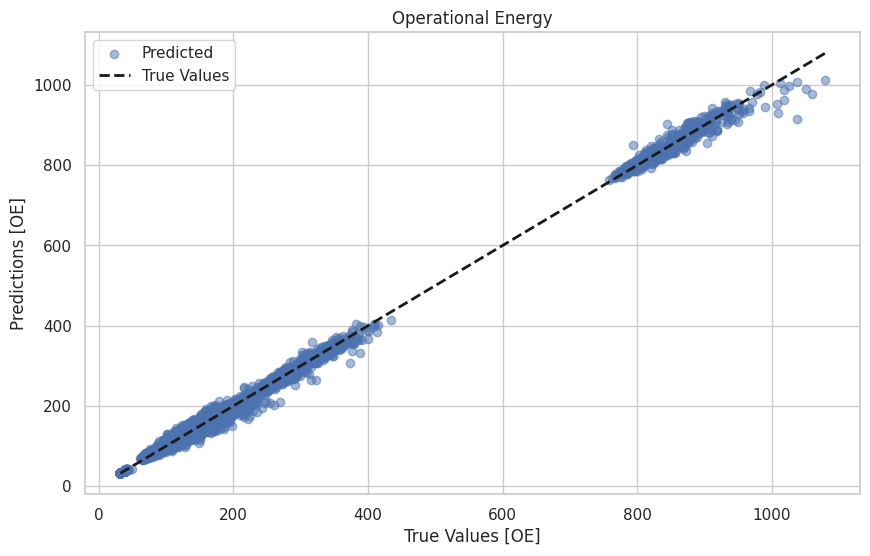

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='True Values')

plt.xlabel('True Values [OE]')
plt.ylabel('Predictions [OE]')
plt.title('Operational Energy')

plt.legend()
plt.show()

Here is the scatter plot illustrating the relationship between the true values of the response variable and the values predicted by the Random Forest Regressor. Each point represents a different observation from the test set.

The diagonal dashed line represents the line of perfect predictions where the true values are exactly equal to the predicted values. Ideally, all points should fall on or very close to this line, indicating accurate predictions.

The points are very tightly clustered around the line, which visually confirms the high R-squared value we saw earlier. This suggests that the model's predictions are very close to the actual values for most of the test data. However, it's always good to remain cautious of overfitting and validate the model further with cross-validation if needed.

<hr>
<h3>Cross Validation 5-fold<h3>

In [ ]:
cv_scores = cross_val_score(random_forest, pred, resp, cv=5, scoring='r2')

cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

(cv_mean, cv_std)

(0.998334954516479, 0.00011075801726058906)

In [ ]:
cv_scores

array([0.99839157, 0.99839548, 0.99829064, 0.99814066, 0.99845642])

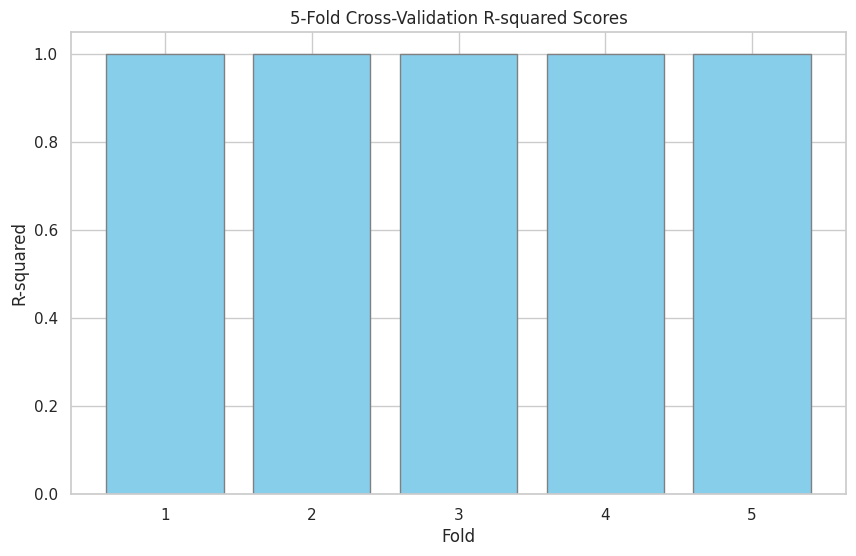

In [ ]:
n_folds = len(cv_scores)
folds = range(1, n_folds + 1)

plt.figure(figsize=(10, 6))
plt.bar(folds, cv_scores, color='skyblue', edgecolor='grey')

plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('5-Fold Cross-Validation R-squared Scores')
plt.xticks(folds)

plt.show()

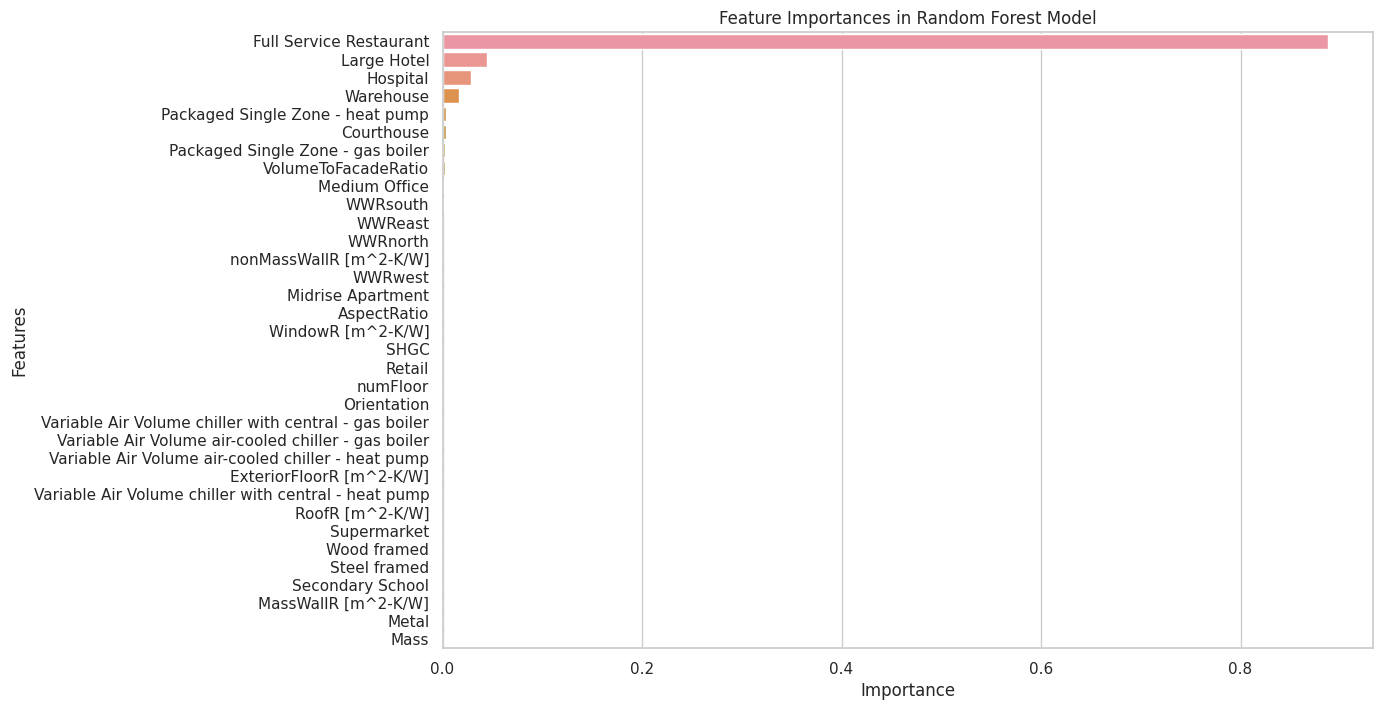

Full Service Restaurant                                  0.887932
Large Hotel                                              0.044369
Hospital                                                 0.028188
Warehouse                                                0.016800
Packaged Single Zone - heat pump                         0.003845
Courthouse                                               0.003639
Packaged Single Zone - gas boiler                        0.002594
VolumeToFacadeRatio                                      0.002088
Medium Office                                            0.001828
WWRsouth                                                 0.001045
WWReast                                                  0.000945
WWRnorth                                                 0.000916
nonMassWallR [m^2-K/W]                                   0.000791
WWRwest                                                  0.000767
Midrise Apartment                                        0.000636
AspectRati

In [ ]:
feature_importances = random_forest.feature_importances_

feature_names = pred.columns

importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index)

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest Model')

plt.show()

importances